In [1]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

In [2]:
data = pd.read_csv('credit_card_approval.csv')

In [4]:
df = data.copy()

In [5]:
df

,Age,Credit Score,Annual Income,PriorDefault,Employed,Approval,Gender
0,33.541537,678.0,53.984881,0,1,No,Male
1,24.808335,624.0,41.131160,1,0,No,Male
2,23.342078,671.0,33.012298,1,1,No,Female
3,29.987970,671.0,66.942232,1,1,No,Female
4,29.707443,630.0,116.613468,1,1,No,Male
...,...,...,...,...,...,...,...
2495,41.401327,768.0,65.869626,0,0,No,Male
2496,31.341132,733.0,56.156239,0,1,Yes,Male
2497,43.622086,724.0,105.815964,0,0,No,Male
2498,44.091122,741.0,121.522753,0,1,Yes,Female


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2500.0,37.014342,9.814617,16.40,29.788468,35.487664,42.573775,78.2
Credit Score,2500.0,703.019600,60.102094,342.00,666.000000,713.000000,747.000000,837.0
Annual Income,2500.0,76.421887,32.942672,4.87,51.732313,71.695510,97.244651,204.4
PriorDefault,2500.0,0.300000,0.458349,0.00,0.000000,0.000000,1.000000,1.0
Employed,2500.0,0.702000,0.457471,0.00,0.000000,1.000000,1.000000,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            2500 non-null   float64
 1   Credit Score   2500 non-null   float64
 2   Annual Income  2500 non-null   float64
 3   PriorDefault   2500 non-null   int64  
 4   Employed       2500 non-null   int64  
 5   Approval       2500 non-null   object 
 6   Gender         2500 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 136.8+ KB


In [9]:
data.duplicated().sum()

0

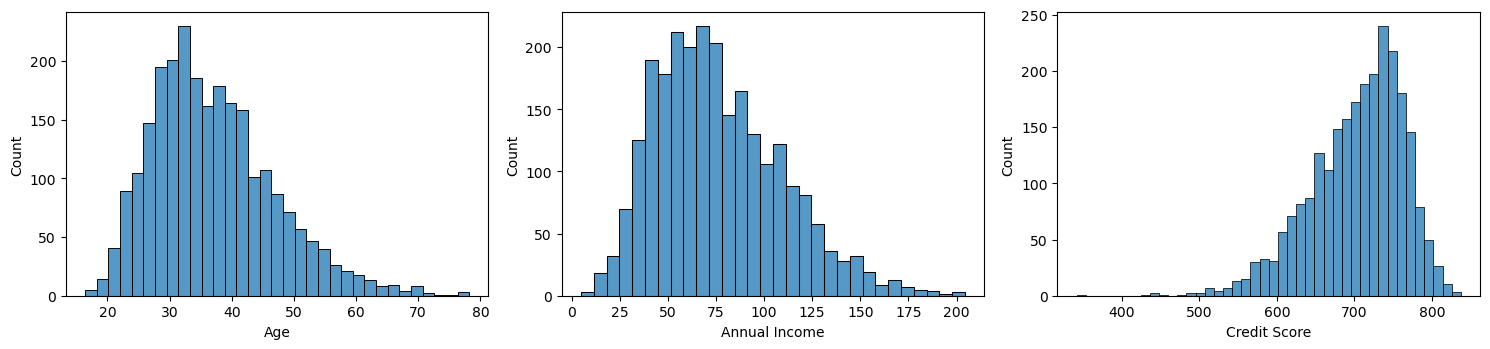

In [11]:
plt.figure(figsize=(15,10))

features = ['Age', 'Annual Income', 'Credit Score']

for i, feature in enumerate(features):
    plt.subplot(3,3,i+1)
    sns.histplot(data=df, x=feature)

plt.tight_layout()


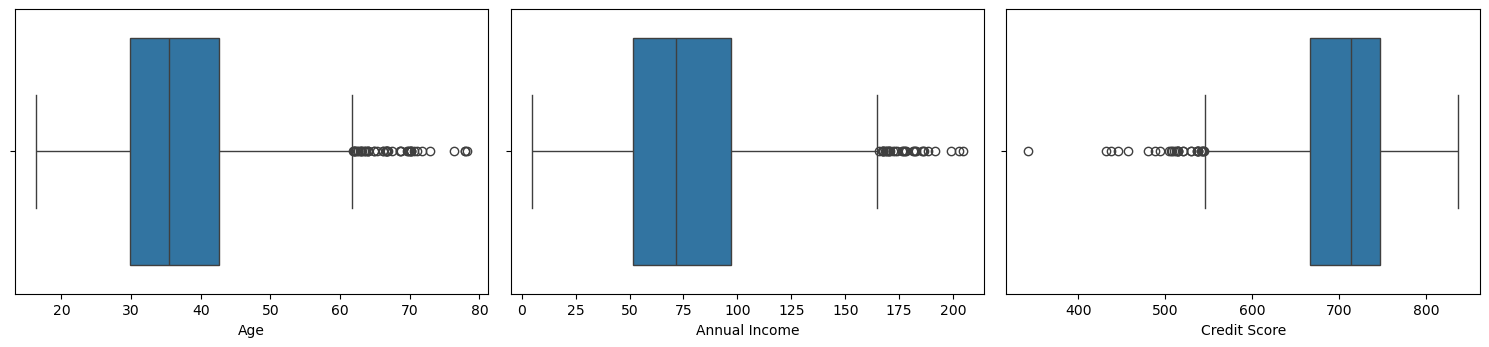

In [12]:
plt.figure(figsize=(15,10))

features = ['Age', 'Annual Income', 'Credit Score']

for i, feature in enumerate(features):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df, x=feature)

plt.tight_layout()

Approval
Yes    0.5604
No     0.4396
Name: proportion, dtype: float64


<Axes: xlabel='Approval', ylabel='count'>

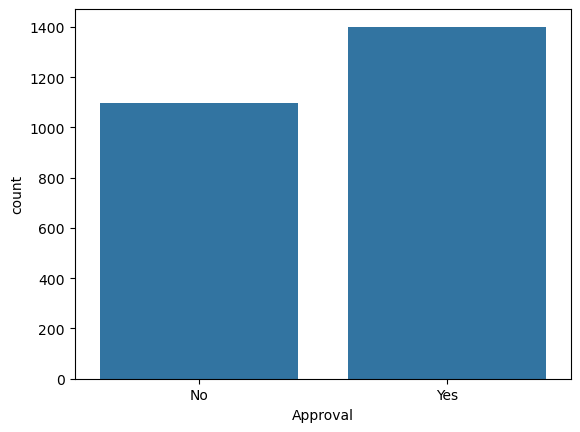

In [16]:
print(df['Approval'].value_counts(normalize=True))
sns.countplot(data=df, x='Approval')

<Axes: >

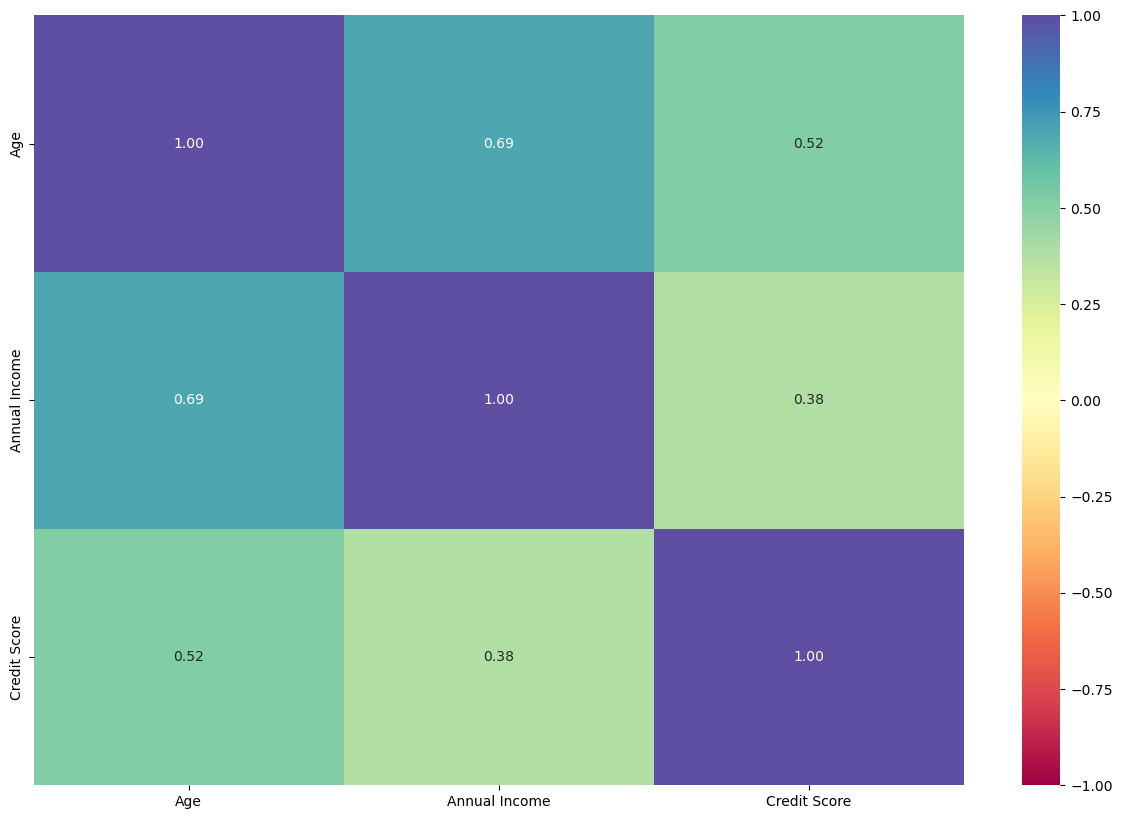

In [18]:
# checking the correleation between the features

plt.figure(figsize=(15,10))

sns.heatmap(data[features].corr(),annot=True,vmin=-1,vmax=1,fmt=".2f",cmap="Spectral")


<Figure size 1200x800 with 0 Axes>

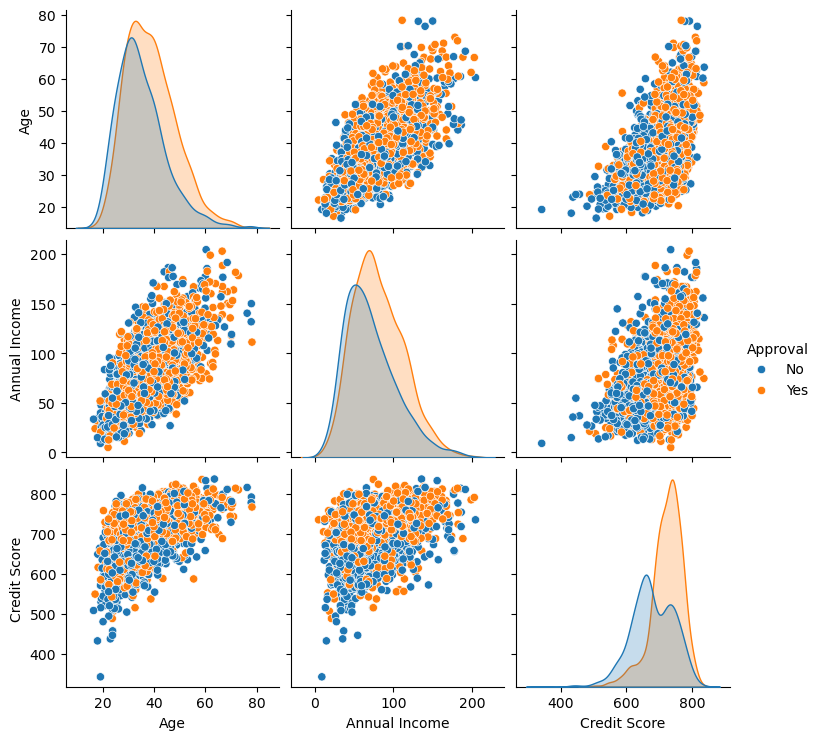

In [19]:
plt.figure(figsize=(12,8))
sns.pairplot(df,vars=features, hue='Approval', diag_kind='kde')

<Axes: xlabel='Approval', ylabel='Credit Score'>

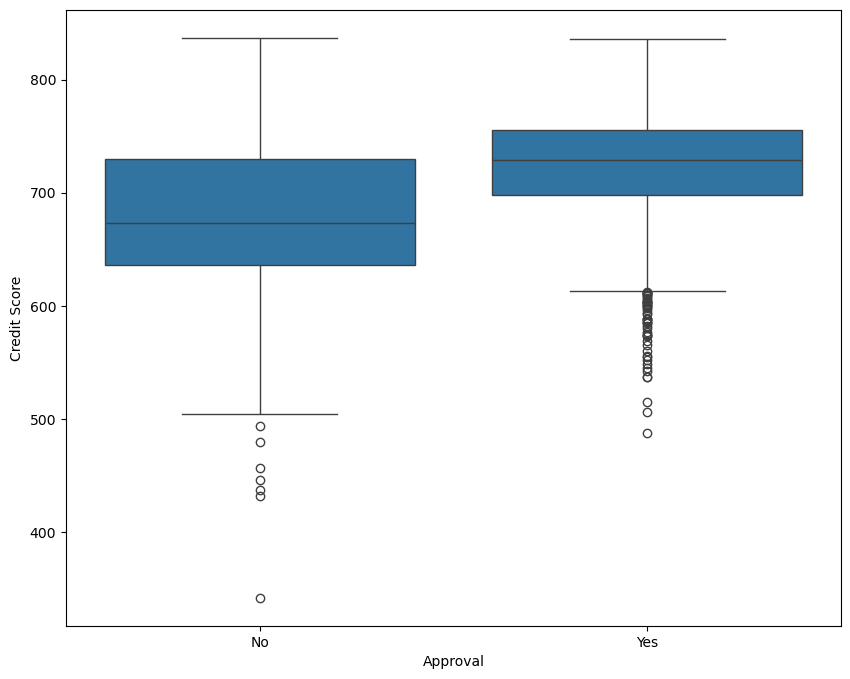

In [20]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='Approval', y='Credit Score')

In [35]:
#Data prep for model
X = df.drop(['Approval'], axis=1)
y = df['Approval']
y

0        No
1        No
2        No
3        No
4        No
       ... 
2495     No
2496    Yes
2497     No
2498    Yes
2499     No
Name: Approval, Length: 2500, dtype: object

In [25]:
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object','category']).columns.tolist())
X = X.astype(float)
X

,Age,Credit Score,Annual Income,PriorDefault,Employed,Gender_Female,Gender_Male,Gender_Others
0,33.541537,678.0,53.984881,0.0,1.0,0.0,1.0,0.0
1,24.808335,624.0,41.131160,1.0,0.0,0.0,1.0,0.0
2,23.342078,671.0,33.012298,1.0,1.0,1.0,0.0,0.0
3,29.987970,671.0,66.942232,1.0,1.0,1.0,0.0,0.0
4,29.707443,630.0,116.613468,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
2495,41.401327,768.0,65.869626,0.0,0.0,0.0,1.0,0.0
2496,31.341132,733.0,56.156239,0.0,1.0,0.0,1.0,0.0
2497,43.622086,724.0,105.815964,0.0,0.0,0.0,1.0,0.0
2498,44.091122,741.0,121.522753,0.0,1.0,1.0,0.0,0.0


In [36]:
y

0        No
1        No
2        No
3        No
4        No
       ... 
2495     No
2496    Yes
2497     No
2498    Yes
2499     No
Name: Approval, Length: 2500, dtype: object

In [1]:
import numpy as np
age_data = [25, 30, 35, 40, 45]
median_age = np.median(age_data)
median_age
np

35.0